In [1]:
print("hi")

hi


In [3]:
from pathlib import Path 
import pandas as pd 
import tarfile 
import urllib.request 

In [4]:
def load_housing_data():
  tarball_path=Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True,exist_ok=True)
    url="https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url,tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv("datasets/housing/housing.csv") 

In [5]:
housing = load_housing_data()

In [6]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
%pip install matplotlib 

  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB 165.2 kB/s eta 0:00:49
   ---------------------------------------- 0.0/8.1 MB 163.8 kB/s eta 0:00:50
   ---------------------------------------- 0.0/8.1 MB 164.3 kB/s eta 0:00:49
   ---------------------------------------- 0.0/8.1 MB 164.3 kB/s eta 0:00:49
   ---------------------------------------- 0.0/8.1


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

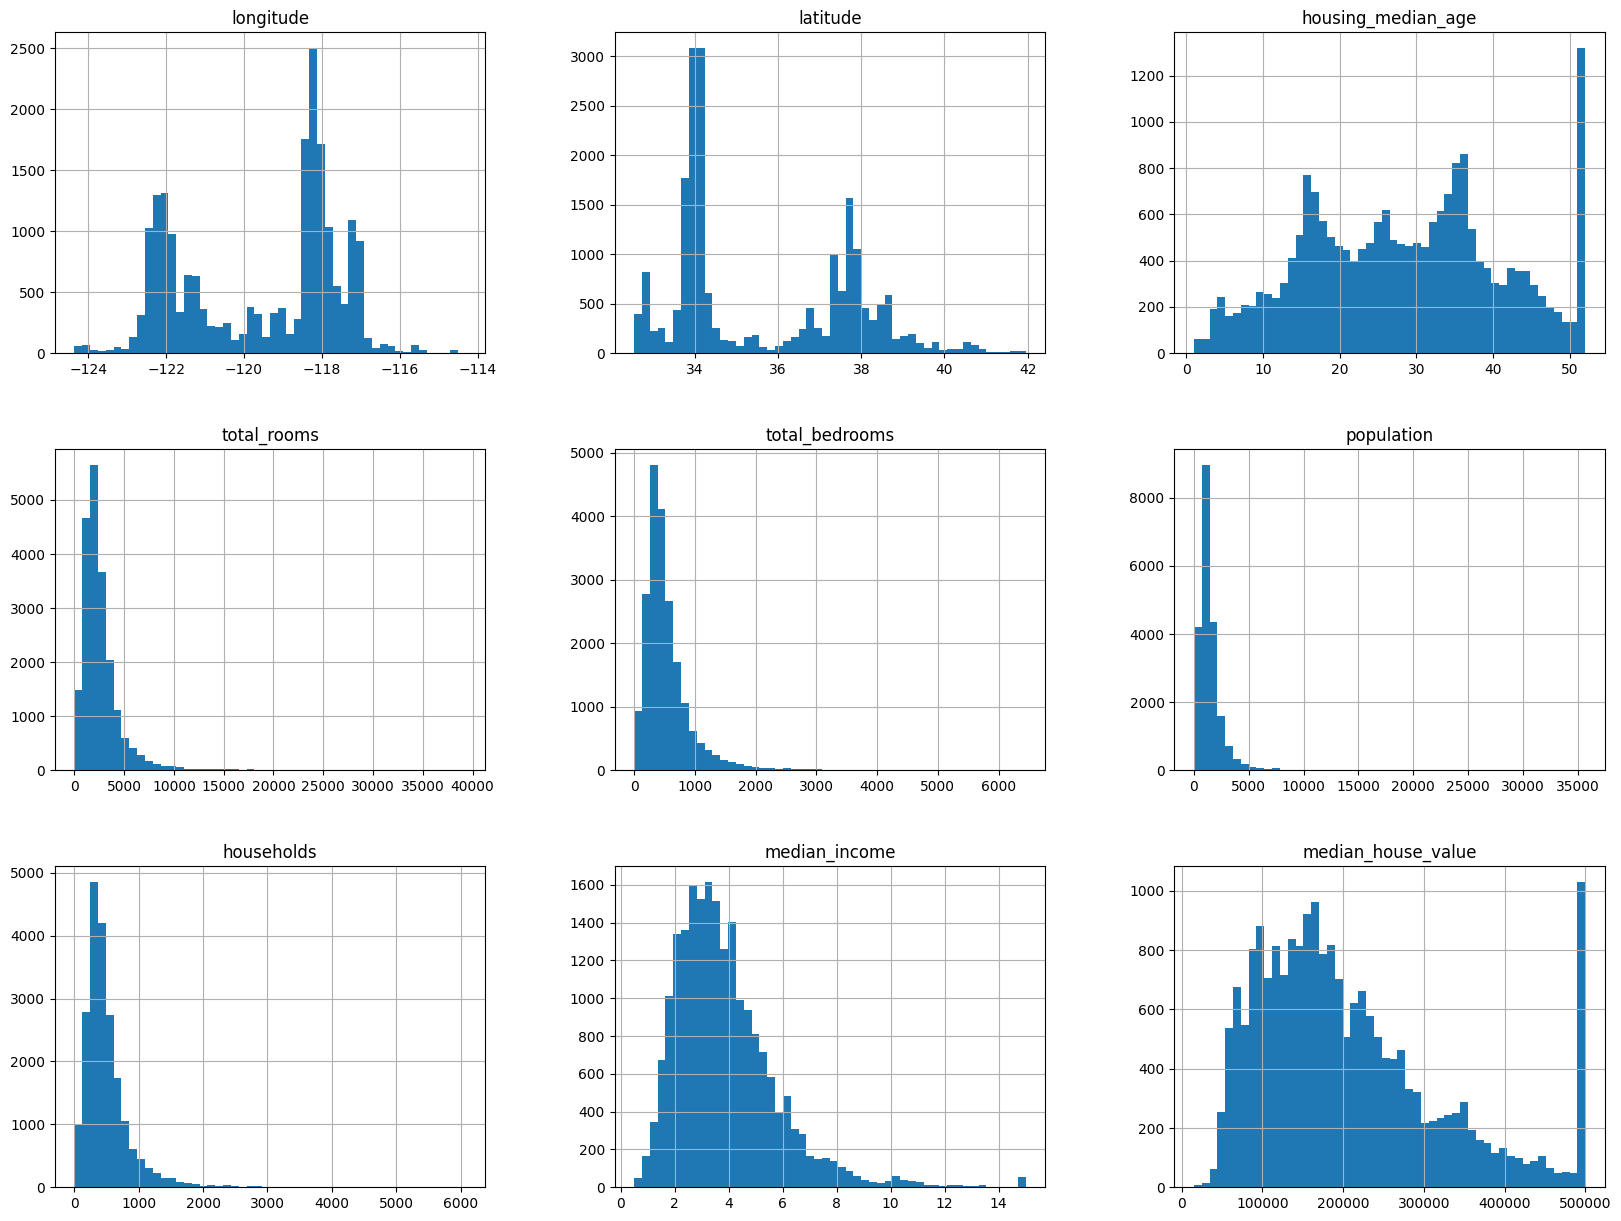

In [7]:
housing.hist(bins=50,figsize=(20,15))

In [11]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl (40.9 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import train_test_split 
train_set, test_set = train_test_split(housing, test_size=0.2, 
random_state=42)

In [26]:
len(train_set)

16512

In [1]:
import numpy as np

In [21]:
housing['income_cut'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [10]:
housing['income_cut'].value_counts()

income_cut
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

In [11]:
housing['income_cut'].value_counts().sort_index()

income_cut
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

In [13]:
import matplotlib.pyplot as plt

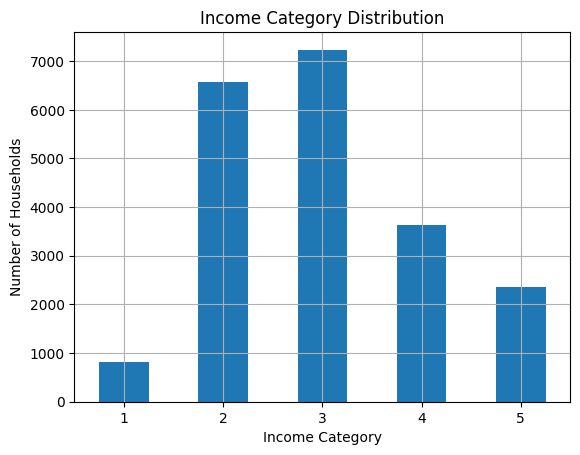

In [14]:
housing['income_cut'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel('Income Category')
plt.ylabel('Number of Households')
plt.title('Income Category Distribution') 
plt.show()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [16]:
splitter

StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None)

In [22]:
strat_splits = [] 
for train_index, test_index in splitter.split(housing, housing["income_cut"]): 
  strat_train_set_n = housing.iloc[train_index] 
  strat_test_set_n = housing.iloc[test_index] 
  strat_splits.append([strat_train_set_n, strat_test_set_n])

In [23]:
strat_train_set, strat_test_set = strat_splits[0]

In [24]:
len(strat_train_set)

16512

In [27]:
len(train_set)

16512

In [25]:
strat_train_set.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity  income_cut
-114.49    33.97     17.0                2809.0       635.0           83.0        45.0        1.6154         87500.0             INLAND           2             1
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0             NEAR OCEAN       3             1
-124.30    41.80     19.0                2672.0       552.0           1298.0      478.0       1.9797         85800.0             NEAR OCEAN       2             1
           41.84     17.0                2677.0       531.0           1244.0      456.0       3.0313         103600.0            NEAR OCEAN       3             1
-124.27    40.69     36.0                2349.0       528.0           1194.0      465.0       2.5179         79000.0             NEAR OCEAN       2             1
                                 

In [29]:
strat_train_set, strat_test_set = train_test_split( 
housing, test_size=0.2, stratify=housing["income_cut"], random_state=42)

In [31]:
for set_ in (strat_train_set, strat_test_set): 
  set_.drop("income_cut", axis=1, inplace=True)

In [32]:
housing = strat_train_set.copy()

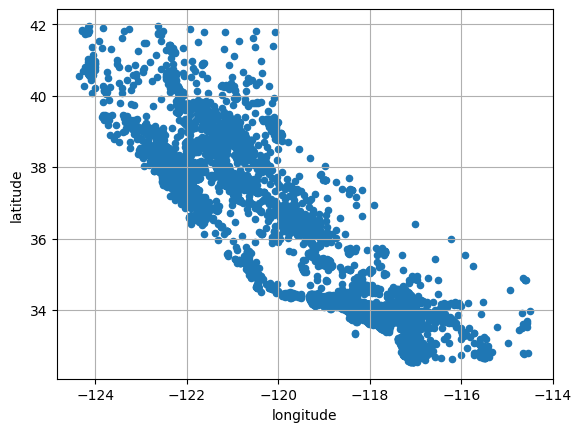

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True) 
plt.show()

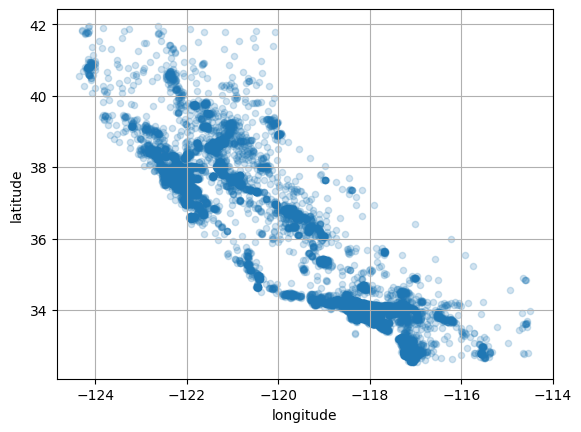

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, 
alpha=0.2) 
plt.show()

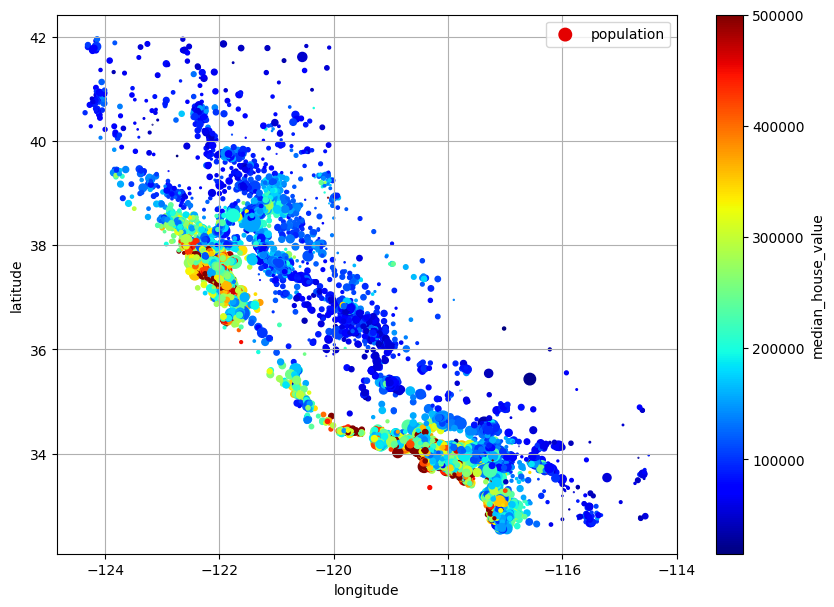

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, 
s=housing["population"] / 100, label="population", 
c="median_house_value", cmap="jet", colorbar=True, 
legend=True, sharex=False, figsize=(10, 7)) 
plt.show()

In [37]:
new_housing=housing.drop(columns='ocean_proximity')

In [38]:
corr_matrix = new_housing.corr()

In [41]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [40]:
corr_matrix['median_house_value'].sort_values()

latitude             -0.139584
longitude            -0.050859
population           -0.020153
total_bedrooms        0.054635
households            0.071426
housing_median_age    0.102175
total_rooms           0.137455
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [42]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"] 
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"] 
housing["people_per_house"] = housing["population"] / housing["households"]

In [43]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

In [44]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

In [45]:
"""Here there are indexes that doesn't make sense they are here because i used stratify in the traintest split and along with randomness in the train test split, so naturally the indexes are not in order housing_labels = strat_train_set["median_house_value"].copy().reset_index(drop=True)
 use this if the indexes have to make sense"""

'Here there are indexes that doesn\'t make sense they are here because i used stratify in the traintest split and along with randomness in the train test split, so naturally the indexes are not in order housing_labels = strat_train_set["median_house_value"].copy().reset_index(drop=True)\n use this if the indexes have to make sense'

In [46]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [47]:
housing_num = housing.select_dtypes(include=[np.number])

In [48]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [49]:
imputer.statistics_ 

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [50]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [ ]:
"""median = housing["total_bedrooms"].median() 
housing["total_bedrooms"].fillna(median, inplace=True)"""

'median = housing["total_bedrooms"].median()  # option 3 \nhousing["total_bedrooms"].fillna(median, inplace=True)'

In [52]:
X = imputer.transform(housing_num)

In [54]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [55]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7274
INLAND        5301
NEAR OCEAN    2089
NEAR BAY      1846
ISLAND           2
Name: count, dtype: int64

In [ ]:
housing_cat = housing[["ocean_proximity"]]

In [57]:
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [59]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encodeded=ordinal_encoder.fit_transform(housing_cat)

In [60]:
housing_cat_encodeded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [61]:
ordinal_encoder.categories_ 

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [62]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_ihot=cat_encoder.fit_transform(housing_cat)

In [63]:
housing_cat_ihot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [64]:
housing_cat_ihot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

In [65]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", 
"ISLAND"]})

In [66]:
cat_encoder.transform(df_test_unknown)

ValueError: Found unknown categories ['<2H OCEAN'] in column 0 during transform

In [67]:
cat_encoder.handle_unknown = "ignore"

In [68]:
cat_encoder.transform(df_test_unknown)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (2, 5)>

In [69]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [70]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [72]:
df_test_unknown

,ocean_proximity
0,<2H OCEAN
1,ISLAND


In [71]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),   columns=cat_encoder.get_feature_names_out(), index=df_test_unknown.index)

ValueError: Shape of passed values is (2, 1), indices imply (2, 5)

In [74]:
df_test_unknown.index

RangeIndex(start=0, stop=2, step=1)

In [73]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Step 1: Define OneHotEncoder with handle_unknown="ignore"
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Step 2: Fit on the training data
cat_encoder.fit(housing[["ocean_proximity"]])

# Step 3: Transform the test data
df_output = pd.DataFrame(
    cat_encoder.transform(df_test_unknown),
    columns=cat_encoder.get_feature_names_out(),
    index=df_test_unknown.index
)

print(df_output)


   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     1.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       0.0                         0.0  
1                       0.0                         0.0  


In [75]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
housing_min_max=min_max_scaler.fit_transform(housing_num)

In [77]:
from sklearn.preprocessing import StandardScaler
std_Scaler=StandardScaler()
housing_std_Scaler=std_Scaler.fit_transform(housing_num)

In [78]:
from sklearn.metrics.pairwise import rbf_kernel

# Compute similarity to 35 years
age_similarity = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)


In [79]:
from sklearn.preprocessing import FunctionTransformer 
 
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp) 
log_pop = log_transformer.transform(housing[["population"]])

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.utils.validation import check_array, check_is_fitted 
 
class StandardScalerClone(BaseEstimator, TransformerMixin): 
    def __init__(self, with_mean=True):  # no *args or **kwargs! 
        self.with_mean = with_mean 
 
    def fit(self, X, y=None):  # y is required even though we don't use it 
        X = check_array(X)  # checks that X is an array with finite float 
        self.mean_ = X.mean(axis=0) 
        self.scale_ = X.std(axis=0) 
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit() 
        return self  # always return self! 
 
    def transform(self, X): 
        check_is_fitted(self)  # looks for learned attributes (with trailing _) 
        X = check_array(X) 
        assert self.n_features_in_ == X.shape[1] 
        if self.with_mean: 
          X = X - self.mean_ 
        return X / self.scale_

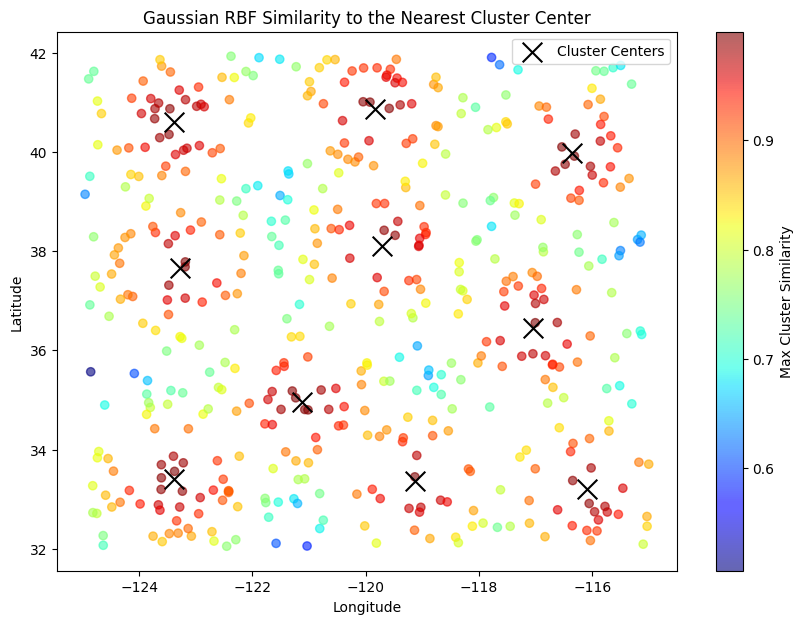

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

# Generate Sample Data (Using Latitude & Longitude of Districts)
np.random.seed(42)
num_districts = 500
latitude = np.random.uniform(32, 42, num_districts)  # Random latitudes
longitude = np.random.uniform(-125, -115, num_districts)  # Random longitudes
districts = np.column_stack((latitude, longitude))

# Apply KMeans Clustering
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(districts)

# Compute RBF Kernel Similarities
gamma = 0.1  # Controls similarity decay
rbf_similarities = rbf_kernel(districts, kmeans.cluster_centers_, gamma=gamma)

# Get Maximum Similarity for Each District
max_similarities = np.max(rbf_similarities, axis=1)

# Plot the Districts with Their RBF Similarity
plt.figure(figsize=(10, 7))
plt.scatter(districts[:, 1], districts[:, 0], c=max_similarities, cmap="jet", alpha=0.6)
plt.colorbar(label="Max Cluster Similarity")
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], 
            marker='x', s=200, color='black', label="Cluster Centers")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Gaussian RBF Similarity to the Nearest Cluster Center")
plt.legend()
plt.show()


In [85]:
class ClusterSimilarity(BaseEstimator, TransformerMixin): 
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None): 
        self.n_clusters = n_clusters 
        self.gamma = gamma 
        self.random_state = random_state 
 
    def fit(self, X, y=None, sample_weight=None): 
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state) 
        self.kmeans_.fit(X, sample_weight=sample_weight) 
        return self  # always return self! 
 
    def transform(self, X): 
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma) 
 
    def get_feature_names_out(self, names=None): 
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [86]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42) 
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], 
                                           sample_weight=housing_labels)

In [ ]:
max_similarities = np.max(similarities, axis=1)

C:\Users\bored\AppData\Local\Temp\ipykernel_26368\4078200502.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


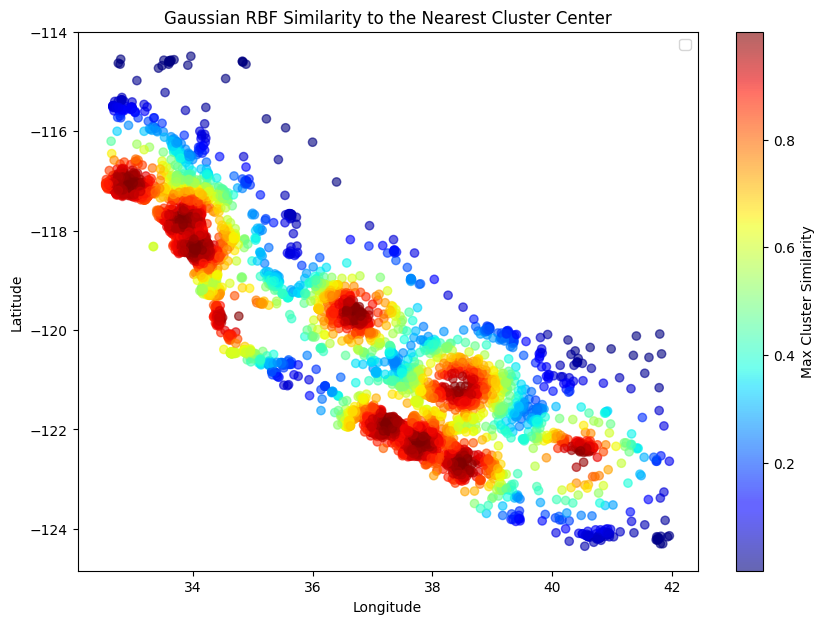

In [ ]:
# Get Maximum Similarity for Each District
# Plot the Districts with Their RBF Similarity
plt.figure(figsize=(10, 7))
plt.scatter(housing["latitude"], housing["longitude"], c=max_similarities, cmap="jet", alpha=0.6)
plt.colorbar(label="Max Cluster Similarity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Gaussian RBF Similarity to the Nearest Cluster Center")
plt.legend()
plt.show()


In [90]:
from sklearn.preprocessing import FunctionTransformer 
 
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp) 
log_pop = log_transformer.transform(housing[["population"]])

In [91]:
rbf_transformer = FunctionTransformer(rbf_kernel, 
                                      kw_args=dict(Y=[[35.]], gamma=0.1)) 
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [92]:
from sklearn.pipeline import Pipeline 
num_pipeline = Pipeline([ 
("impute", SimpleImputer(strategy="median")), 
("standardize", StandardScaler()), 
])

In [93]:
from sklearn.pipeline import make_pipeline 
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), 
StandardScaler())

In [94]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

In [95]:
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [96]:
from sklearn.compose import ColumnTransformer 
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", 
"total_bedrooms", "population", "households", "median_income"] 
cat_attribs = ["ocean_proximity"] 
cat_pipeline = make_pipeline( 
SimpleImputer(strategy="most_frequent"), 
OneHotEncoder(handle_unknown="ignore")) 
preprocessing = ColumnTransformer([ 
("num", num_pipeline, num_attribs), 
("cat", cat_pipeline, cat_attribs), 
])

In [97]:
from sklearn.compose import make_column_selector, make_column_transformer 
preprocessing = make_column_transformer( 
(num_pipeline, make_column_selector(dtype_include=np.number)), 
(cat_pipeline, make_column_selector(dtype_include=object)), 
)

In [104]:
housing_prepared = preprocessing.fit_transform(housing)

In [99]:
def column_ratio(X): 
    return X[:, [0]] / X[:, [1]] 
 
def ratio_name(function_transformer, feature_names_in): 
    return ["ratio"]  # feature names out 
 
def ratio_pipeline(): 
    return make_pipeline( 
        SimpleImputer(strategy="median"), 
        FunctionTransformer(column_ratio, feature_names_out=ratio_name), 
        StandardScaler()) 
 
log_pipeline = make_pipeline( 
    SimpleImputer(strategy="median"), 
    FunctionTransformer(np.log, feature_names_out="one-to-one"), 
    StandardScaler()) 
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

In [100]:
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), 
                                     StandardScaler()) 
preprocessing = ColumnTransformer([ 
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]), 
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]), 
        ("people_per_house", ratio_pipeline(), ["population", "households"]), 
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", 
                               "households", "median_income"]), 
        ("geo", cluster_simil, ["latitude", "longitude"]), 
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)), 
    ], 
    remainder=default_num_pipeline)

In [101]:
housing_prepared = preprocessing.fit_transform(housing)

In [102]:
housing_prepared.shape

(16512, 24)

In [103]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [105]:
from sklearn.linear_model import LinearRegression 
lin_reg = make_pipeline(preprocessing, LinearRegression()) 
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001261B529B20>)])),
                ('linearregression', LinearRegression())])

In [106]:
housing_predictions = lin_reg.predict(housing)

In [107]:
housing_predictions[:5].round(-2)

array([246000., 372700., 135700.,  91400., 330900.])

In [110]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
tree_reg = make_pipeline(preprocessing, 
DecisionTreeRegressor(random_state=42)) 
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001261B529B20>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [112]:
from sklearn.model_selection import cross_val_score 
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, 
scoring="neg_root_mean_squared_error", cv=10)

In [113]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66573.734600
std       1103.402323
min      64607.896046
25%      66204.731788
50%      66388.272499
75%      66826.257468
max      68532.210664
dtype: float64

In [114]:
from sklearn.ensemble import RandomForestRegressor 
 
forest_reg = make_pipeline(preprocessing, 
                           RandomForestRegressor(random_state=42)) 
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, 
                                scoring="neg_root_mean_squared_error", cv=10)

In [115]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47038.092799
std       1021.491757
min      45495.976649
25%      46510.418013
50%      47118.719249
75%      47480.519175
max      49140.832210
dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV 


full_pipeline = Pipeline([ 
("preprocessing", preprocessing), 
("random_forest", RandomForestRegressor(random_state=42)), 
]) 


param_grid = [ 
{'preprocessing__geo__n_clusters': [5, 8, 10], 
'random_forest__max_features': [4, 6, 8]}, 
{'preprocessing__geo__n_clusters': [10, 15], 
'random_forest__max_features': [6, 8, 10]}, 
]



grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,scoring='neg_root_mean_squared_error') 
grid_search.fit(housing, housing_labels)